In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns

#### 1. Importing and Verifying Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = \
tf.keras.datasets.cifar10.load_data()

In [3]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<b> Checking the data

In [4]:
print(train_images.shape)
print(train_labels.shape) 
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<b> Random check of a sample

Text(0.5, 0, 'dog-[5]')

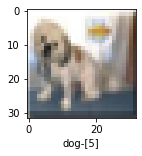

In [5]:
i = np.random.randint(len(train_images))
plt.figure(figsize=(10,2))
plt.imshow(train_images[i])
plt.xlabel(label_names[int(train_labels[i])] + "-" + str(train_labels[i]))

<b> Generating 10 random images from each class

In [6]:
labels = np.unique(train_labels)
final_list = []
name_list = []
labels = np.unique(train_labels)
for label in labels: #specify the label of choice as filter condition
    label_list = list(np.where(train_labels == label)[0]) #filter the train_labels by the condition, obtain the index numbers
    for iter in range(10): #get the 10 random index from the label list
        label_index = np.random.choice(tuple(label_list), replace=True)
        final_list.append(label_index)
        name_list.append(label_names[int(train_labels[label_index])])

<b> Plotting these 100 random images, each class is arranged in the same row for ease of checking

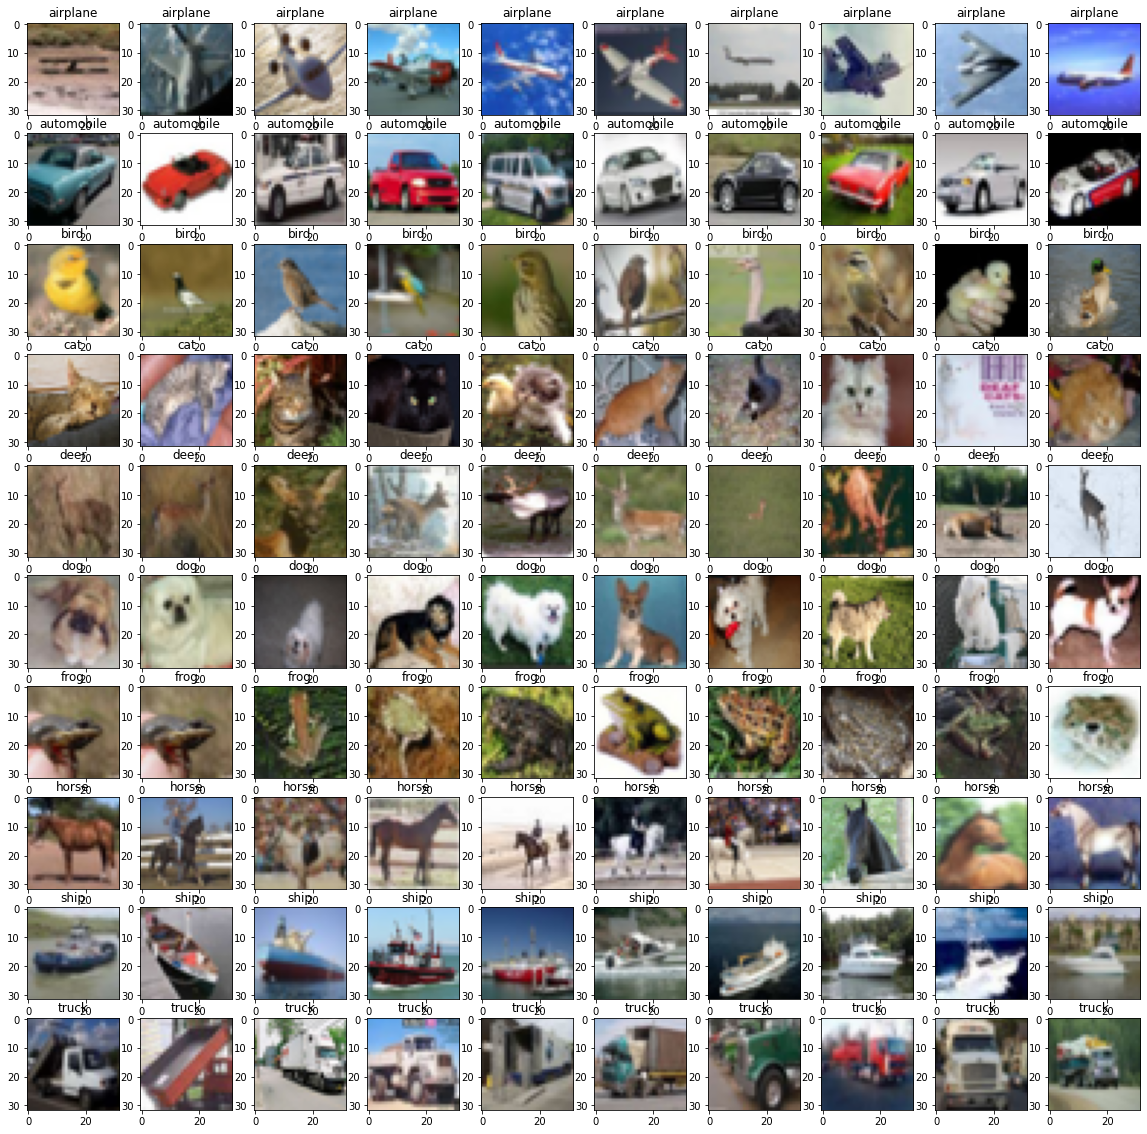

In [7]:
fig, ax = plt.subplots(10, 10, figsize=(20,20))
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(train_images[final_list[k]])
        ax[i][j].set_title(name_list[k])
        k += 1
plt.show()

##### Normalizing the image data

In [8]:
x_train = train_images/255
x_test = test_images/255

##### One-hot encoding the label data

In [9]:
y_train_onehot = to_categorical(train_labels)
y_test_onehot = to_categorical(test_labels)

##### Transform the labels array into a simple list for visualization later

In [10]:
y_train = train_labels.reshape(-1,)
y_test = test_labels.reshape(-1,)

#### 2. Build a multi-class classification model using a linear model. Which class is most confused with which other class? Why?

##### 2.1. Model Architecture

<b>Linear Model is equivalent to a dense network without any non-linear activation function being specified.<br>
Here, an arbitrary number of layers (1000) is used

In [11]:
lin = Sequential()
lin.add(Flatten(input_shape=(32,32,3)))
lin.add(Dense(1000))
lin.add(Dense(10, activation='softmax'))

##### 2.2. Model Compiling and Fitting on Training Set

In [12]:
lin.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])

In [13]:
run_lin = lin.fit(x_train, y_train_onehot, epochs=20, validation_data=(x_test, y_test_onehot))

Epoch 1/20
1563/1563 [==============================] - 23s 14ms/step - loss: 2.3258 - accuracy: 0.3015 - val_loss: 1.8325 - val_accuracy: 0.3464
Epoch 2/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8922 - accuracy: 0.3310 - val_loss: 1.9432 - val_accuracy: 0.3039
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8824 - accuracy: 0.3370 - val_loss: 1.8630 - val_accuracy: 0.3444
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8870 - accuracy: 0.3432 - val_loss: 1.9418 - val_accuracy: 0.3211
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8847 - accuracy: 0.3449 - val_loss: 1.8547 - val_accuracy: 0.3439
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8464 - accuracy: 0.3581 - val_loss: 1.9241 - val_accuracy: 0.3233
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8454 - accuracy: 0.3602 - val_loss: 1.8624 -

##### 2.3. Model Prediction on Test Set

In [14]:
#returns the probability of 10 labels for each of 10,000 test samples:
y_pred_lin = lin.predict(x_test) 

313/313 [==============================] - 1s 4ms/step


In [15]:
#picking the largest probability as the final predicted class:
y_pred_lin = np.argmax(y_pred_lin, axis=1)

##### 2.4. Visualizing model performance and classification report

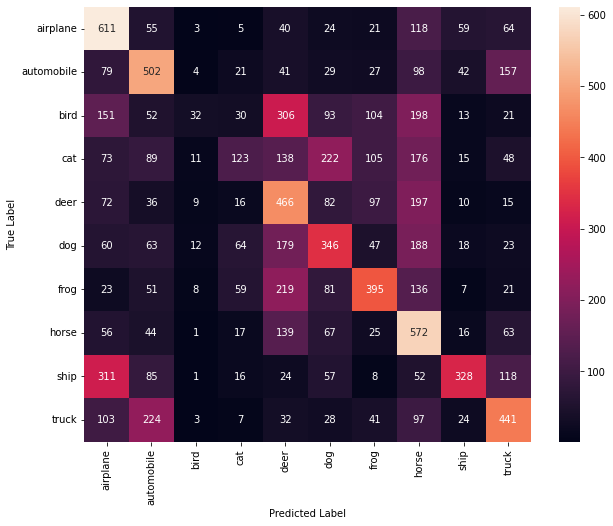

In [16]:
cm_lin = metrics.confusion_matrix(y_test, y_pred_lin)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_lin, annot=True, fmt='g', xticklabels=label_names, yticklabels=label_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

In [17]:
print(metrics.classification_report(y_test, y_pred_lin))

              precision    recall  f1-score   support

           0       0.40      0.61      0.48      1000
           1       0.42      0.50      0.46      1000
           2       0.38      0.03      0.06      1000
           3       0.34      0.12      0.18      1000
           4       0.29      0.47      0.36      1000
           5       0.34      0.35      0.34      1000
           6       0.45      0.40      0.42      1000
           7       0.31      0.57      0.40      1000
           8       0.62      0.33      0.43      1000
           9       0.45      0.44      0.45      1000

    accuracy                           0.38     10000
   macro avg       0.40      0.38      0.36     10000
weighted avg       0.40      0.38      0.36     10000



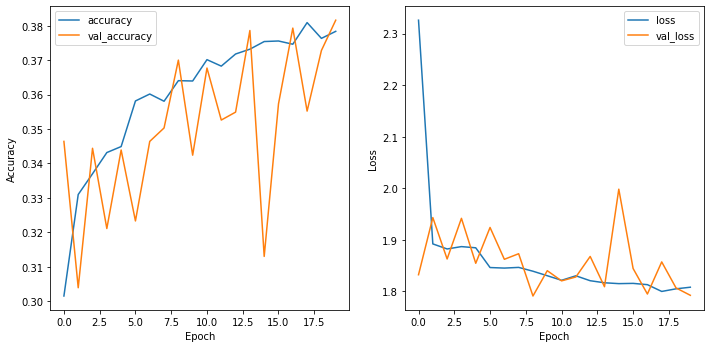

In [18]:
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.set(xlabel = 'Epoch', ylabel = 'Accuracy')
axes2.set(xlabel = 'Epoch', ylabel = 'Loss')
fig.tight_layout()
axes1.plot(run_lin.history['accuracy'], label='accuracy')
axes1.plot(run_lin.history['val_accuracy'], label='val_accuracy')
axes1.legend()
axes2.plot(run_lin.history['loss'], label='loss')
axes2.plot(run_lin.history['val_loss'], label='val_loss')
axes2.legend()
plt.show()

<b> Observation: birds (class=2) are the most wrongly predicted with very low recall (high false negative), followed by cats (class = 3). They both are often wrongly classified as other animals like dogs (class = 5) deers (class = 4), horse (class 7), resulting in it having very low precision (high false positive). The same can be observed as many horses and birds are wrongly classified as deers. This could be due to the fact that they belong to similar colors (close numbers in the RGB channels), leading to linear models making similar classifications. Linear models cannot learn from other lowe-level features such as edges and other high level features, and cannot classify them well.

#### 3. Build a deeper model

##### 3.1. Model architecture

In [19]:
simple_nn = Sequential()
simple_nn.add(Flatten(input_shape=(32,32,3)))
simple_nn.add(Dense(512, activation='relu'))
simple_nn.add(Dense(256, activation='relu'))
simple_nn.add(Dense(512, activation='relu'))
simple_nn.add(Dense(10, activation='softmax'))

##### 3.2. Model compiling and fitting on training set

In [20]:
simple_nn.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])

In [21]:
run_simple_nn = simple_nn.fit(x_train, y_train_onehot, epochs=20, validation_data=(x_test, y_test_onehot))

Epoch 1/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8541 - accuracy: 0.3210 - val_loss: 1.7013 - val_accuracy: 0.3865
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6820 - accuracy: 0.3943 - val_loss: 1.6111 - val_accuracy: 0.4165
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5968 - accuracy: 0.4243 - val_loss: 1.5944 - val_accuracy: 0.4283
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5458 - accuracy: 0.4456 - val_loss: 1.5226 - val_accuracy: 0.4501
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5079 - accuracy: 0.4590 - val_loss: 1.5415 - val_accuracy: 0.4554
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4751 - accuracy: 0.4677 - val_loss: 1.5148 - val_accuracy: 0.4649
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4491 - accuracy: 0.4789 - val_loss: 1.4932 -

##### 3.3. Model Prediction on test set

In [22]:
#returns the probability of 10 labels for each of 10,000 test samples:
y_pred = simple_nn.predict(x_test) 

#picking the largest probability as the final predicted class:
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 4ms/step


##### 3.4. Visualizing model performance and classification report

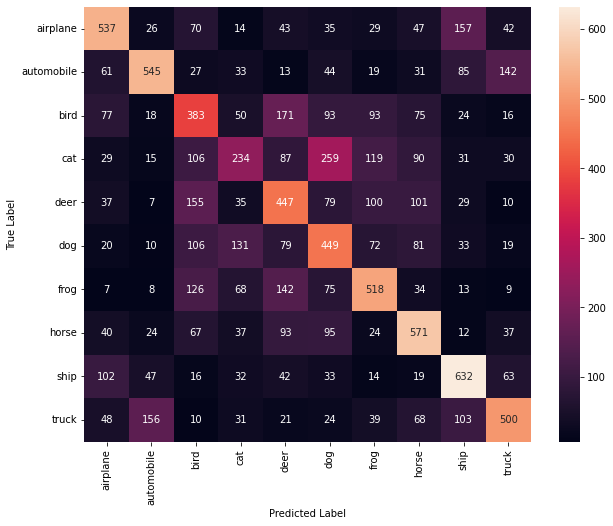

In [23]:
cm_nn = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_nn, annot=True, fmt='g', xticklabels=label_names, yticklabels=label_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1000
           1       0.64      0.55      0.59      1000
           2       0.36      0.38      0.37      1000
           3       0.35      0.23      0.28      1000
           4       0.39      0.45      0.42      1000
           5       0.38      0.45      0.41      1000
           6       0.50      0.52      0.51      1000
           7       0.51      0.57      0.54      1000
           8       0.56      0.63      0.60      1000
           9       0.58      0.50      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



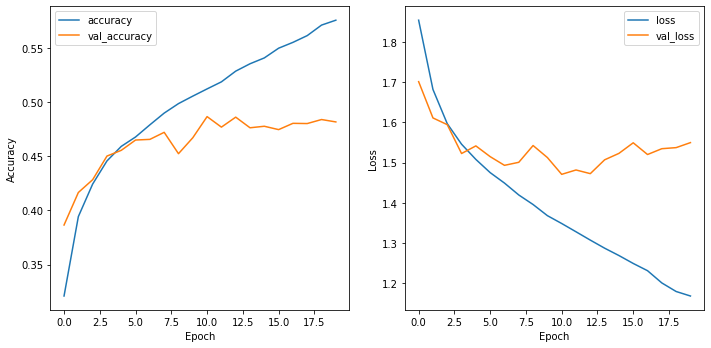

In [25]:
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.set(xlabel = 'Epoch', ylabel = 'Accuracy')
axes2.set(xlabel = 'Epoch', ylabel = 'Loss')
fig.tight_layout()
axes1.plot(run_simple_nn.history['accuracy'], label='accuracy')
axes1.plot(run_simple_nn.history['val_accuracy'], label='val_accuracy')
axes1.legend()
axes2.plot(run_simple_nn.history['loss'], label='loss')
axes2.plot(run_simple_nn.history['val_loss'], label='val_loss')
axes2.legend()
plt.show()

<b> Observation: the deeper model with non-linear activation functions performs better than the linear model. Precision and recall scores are improved across the board. However, it still confuses quite significantly among the animals (class 2 to 5). However, true classification of cats, deer, bird and dog across the diagonal are now the majority in the confusion matrix, unlike the previous linear model. <br>
    Also from the val_accuracy and val_loss vs epoch charts below, this model remains stable without learning improvement as epoch grows.

#### 4. Design a CNN

##### 4.1. Model architecture

The architecture tested below is inspired by VGG-16 (alternate Conv-MaxPool, 3x3 kernel, stride 1x1 'same' padding) and modified by using drop out layers by the following source: <br>
https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

Trial 1

In [38]:
cnn4 = Sequential()

# input layer
cnn4.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
cnn4.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Dropout(0.25))

# flatten output of conv
cnn4.add(Flatten())

# dense connected layers
cnn4.add(Dense(2000, activation='relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(1000, activation='relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(500, activation='relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(250, activation='relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(100, activation='relu'))
# output layer
cnn4.add(Dense(10, activation='softmax'))

Trial 2

In [44]:
cnn5 = Sequential()

# input layer
cnn5.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

# convolutional layer
cnn5.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

# add another layer
cnn5.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Dropout(0.2))

# flatten output of conv
cnn5.add(Flatten())

# dense connected layers
cnn5.add(Dense(500, activation='relu'))
cnn5.add(Dropout(0.2))
cnn5.add(Dense(250, activation='relu'))
cnn5.add(Dropout(0.2))
# output layer
cnn5.add(Dense(10, activation='softmax'))

##### 4.2. Model compiling and fitting on training set

In [39]:
cnn4.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])

In [40]:
run_cnn4 = cnn4.fit(x_train, y_train_onehot, epochs=20, validation_data=(x_test, y_test_onehot))

Epoch 1/20
1563/1563 [==============================] - 179s 114ms/step - loss: 1.9018 - accuracy: 0.2370 - val_loss: 1.6646 - val_accuracy: 0.3165
Epoch 2/20
1563/1563 [==============================] - 171s 110ms/step - loss: 1.6128 - accuracy: 0.3810 - val_loss: 1.4598 - val_accuracy: 0.4457
Epoch 3/20
1563/1563 [==============================] - 171s 109ms/step - loss: 1.4417 - accuracy: 0.4724 - val_loss: 1.3025 - val_accuracy: 0.5339
Epoch 4/20
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3092 - accuracy: 0.5326 - val_loss: 1.1624 - val_accuracy: 0.5886
Epoch 5/20
1563/1563 [==============================] - 172s 110ms/step - loss: 1.2307 - accuracy: 0.5657 - val_loss: 1.1494 - val_accuracy: 0.6083
Epoch 6/20
1563/1563 [==============================] - 172s 110ms/step - loss: 1.1701 - accuracy: 0.5935 - val_loss: 1.0944 - val_accuracy: 0.6288
Epoch 7/20
1563/1563 [==============================] - 171s 109ms/step - loss: 1.1174 - accuracy: 0.6124 - val_

In [45]:
cnn5.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])

In [46]:
run_cnn5 = cnn5.fit(x_train, y_train_onehot, epochs=20, validation_data=(x_test, y_test_onehot))

Epoch 1/20
1563/1563 [==============================] - 339s 216ms/step - loss: 1.5997 - accuracy: 0.4054 - val_loss: 1.2450 - val_accuracy: 0.5572
Epoch 2/20
1563/1563 [==============================] - 2018s 1s/step - loss: 1.1808 - accuracy: 0.5770 - val_loss: 1.0023 - val_accuracy: 0.6413
Epoch 3/20
1563/1563 [==============================] - 331s 212ms/step - loss: 1.0139 - accuracy: 0.6435 - val_loss: 0.8800 - val_accuracy: 0.6890
Epoch 4/20
1563/1563 [==============================] - 328s 210ms/step - loss: 0.9070 - accuracy: 0.6828 - val_loss: 0.8465 - val_accuracy: 0.7086
Epoch 5/20
1563/1563 [==============================] - 329s 211ms/step - loss: 0.8462 - accuracy: 0.7098 - val_loss: 0.7892 - val_accuracy: 0.7257
Epoch 6/20
1563/1563 [==============================] - 327s 209ms/step - loss: 0.7965 - accuracy: 0.7224 - val_loss: 0.7638 - val_accuracy: 0.7380
Epoch 7/20
1563/1563 [==============================] - 330s 211ms/step - loss: 0.7623 - accuracy: 0.7354 - val_lo

##### 4.3. Model prediction on test set

Picking cnn5 as the final version

In [47]:
#returns the probability of 10 labels for each of 10,000 test samples:
y_pred_cnn5 = cnn5.predict(x_test) 

#picking the largest probability as the final predicted class:
y_pred_cnn5 = np.argmax(y_pred_cnn5, axis=1)

313/313 [==============================] - 11s 33ms/step


##### 4.4. Visualizing model performance and classification report

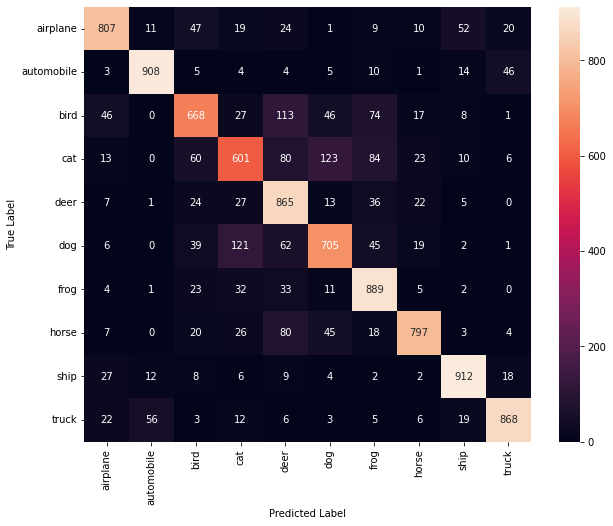

In [54]:
cm_cnn = metrics.confusion_matrix(y_test, y_pred_cnn5)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_cnn, annot=True, fmt='g', xticklabels=label_names, yticklabels=label_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

In [49]:
print(metrics.classification_report(y_test, y_pred_cnn5))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.92      0.91      0.91      1000
           2       0.74      0.67      0.70      1000
           3       0.69      0.60      0.64      1000
           4       0.68      0.86      0.76      1000
           5       0.74      0.70      0.72      1000
           6       0.76      0.89      0.82      1000
           7       0.88      0.80      0.84      1000
           8       0.89      0.91      0.90      1000
           9       0.90      0.87      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



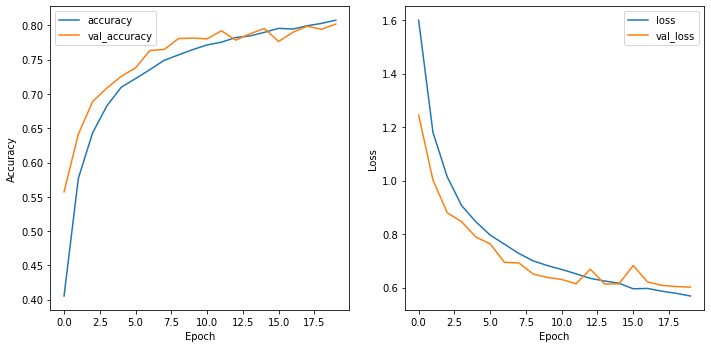

In [50]:
fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.set(xlabel = 'Epoch', ylabel = 'Accuracy')
axes2.set(xlabel = 'Epoch', ylabel = 'Loss')
fig.tight_layout()
axes1.plot(run_cnn5.history['accuracy'], label='accuracy')
axes1.plot(run_cnn5.history['val_accuracy'], label='val_accuracy')
axes1.legend()
axes2.plot(run_cnn5.history['loss'], label='loss')
axes2.plot(run_cnn5.history['val_loss'], label='val_loss')
axes2.legend()
plt.show()

<b> Observation: The cnn model performs quite well with improved recall and precisions across all the classes. Cat-dog-deer-bird are still the most confused classes but significant true classification is achieved across the diagonal of the confusion matrix. Moreover, the val-accuracy and val_loss curves show significant improvements as more epochs are run, and show potential improvement (not yet plateu) if more epochs are run.

##### 4.5. Comparing with the fnn model in section 3

<b> Observation: Based on the summary report above, the cnn model is more accurate at the macro average of ~80% vs 49% of the fnn model. The number of trainable parameters is slightly less at about 1.6mil vs about 1.8mil in fnn. However, the performance from these smaller number of trained parameters is clearly superior.

In [51]:
cnn5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 50)        1400      
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        28864     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [52]:
simple_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,418
Trainable params: 1,841,418
Non-trainable params: 0
_________________________________________________________________
